## Objective
To perform exploratory data analysis to determine whether a patient will survive for 5 years or longer based on the attributes of haberman.csv dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

The required libraries to perform Exploratory Data Analysis are imported 

In [2]:
df = pd.read_csv('haberman.csv') # Dataset is loaded 
df.columns=['Age','Year','Nodes','Status'] # Hence columns name are numerical values.So,Columns names are defined to improve readability
df

,Age,Year,Nodes,Status
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1
...,...,...,...,...
300,75,62,1,1
301,76,67,0,1
302,77,65,3,1
303,78,65,1,2


In [3]:
print(df.shape)# number of data points and columns are printed..
print('')
print(df.info())

(305, 4)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Age     305 non-null    int64
 1   Year    305 non-null    int64
 2   Nodes   305 non-null    int64
 3   Status  305 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB
None


### Observation:
1.The above csv files consist of four attributes and all of them are numerical values.

2.Column names for each attribute is defined for better understanding.

3.All we can conclude that it comprises of 305 rows and 4 columns.

The various attributes of the data set are:

1.Age of patient at the time of surgery(numerical)

2.Patient’s year of operation (year between 1958 to 1969, numerical)

3.Number of nodes detected (numerical)

4.Survival status (class attribute) denoted as:

1 — if the patient survived 5 years or longer 

2 — if the patient died within 5 years

5.All the values are numerical and don't have a null value and the values are indexed from 0 to 304.


In [4]:
df.describe()# To describe all statistical measures

,Age,Year,Nodes,Status
count,305.000000,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066,1.265574
std,10.744024,3.254078,7.199370,0.442364
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,61.000000,66.000000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


### Observation:
1.All the statistical measures are displayed for each attribute individually such as mean,count,minimum val and maximum val etc.

2.we have 305 rows and 4 columns in "Haberman" dataset.

In [5]:
print(df.head()) # First 5 rows of dataset

   Age  Year  Nodes  Status
0   30    62      3       1
1   30    65      0       1
2   31    59      2       1
3   31    65      4       1
4   33    58     10       1


In [6]:
print(df['Status'].value_counts())# Datapoints for each label class

1    224
2     81
Name: Status, dtype: int64


### Observation:

1.Here,it can be inferred that the data is imbalanced data as both classes have distinct number of values.

2.There are only two class objects in the status attribute.

3.The count of Patients who survived is 224 and  the count of Patients who were died is 81.

In [7]:
status1 = df.loc[df['Status']==1]
print(status1)

     Age  Year  Nodes  Status
0     30    62      3       1
1     30    65      0       1
2     31    59      2       1
3     31    65      4       1
4     33    58     10       1
..   ...   ...    ...     ...
297   73    68      0       1
299   74    63      0       1
300   75    62      1       1
301   76    67      0       1
302   77    65      3       1

[224 rows x 4 columns]


In [8]:
status1.describe()

,Age,Year,Nodes,Status
count,224.000000,224.000000,224.000000,224.0
mean,52.116071,62.857143,2.799107,1.0
std,10.937446,3.229231,5.882237,0.0
min,30.000000,58.000000,0.000000,1.0
25%,43.000000,60.000000,0.000000,1.0
50%,52.000000,63.000000,0.000000,1.0
75%,60.000000,66.000000,3.000000,1.0
max,77.000000,69.000000,46.000000,1.0


### Observation:
1.Sub DataFrame of (224 rows and 4 columns) is created which only consists of patient's data who survived more than five years after surgery.

2.The maximum value of nodes is 46.00.So,we can conclude that if the node value is above 46 the patient didn't survive. 

In [9]:
status2 = df.loc[df['Status']==2]
print(status2)

     Age  Year  Nodes  Status
6     34    59      0       2
7     34    66      9       2
23    38    69     21       2
33    39    66      0       2
42    41    60     23       2
..   ...   ...    ...     ...
285   70    58      4       2
292   72    63      0       2
298   74    65      3       2
303   78    65      1       2
304   83    58      2       2

[81 rows x 4 columns]


In [10]:
status2.describe()

,Age,Year,Nodes,Status
count,81.000000,81.000000,81.000000,81.0
mean,53.679012,62.827160,7.456790,2.0
std,10.167137,3.342118,9.185654,0.0
min,34.000000,58.000000,0.000000,2.0
25%,46.000000,59.000000,1.000000,2.0
50%,53.000000,63.000000,4.000000,2.0
75%,61.000000,65.000000,11.000000,2.0
max,83.000000,69.000000,52.000000,2.0


### Observation:

1.Sub DataFrame of (81 rows and 4 columns) is created which only consists of patient's data who died with in five years after their surgery.

2.The average number of nodes in person who had not survived is 4.0.


 # 2-D Scatter Plot (Bivariates)


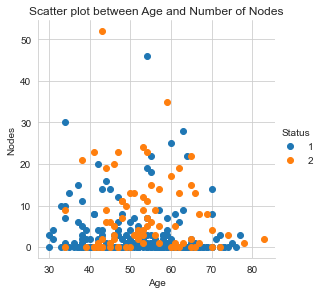

In [11]:
sns.set_style('whitegrid')
sns.FacetGrid(df,hue='Status',height=4)\
   .map(plt.scatter,'Age','Nodes')\
   .add_legend()
plt.title("Scatter plot between Age and Number of Nodes")
plt.show()

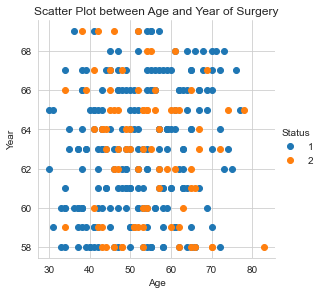

In [12]:
sns.set_style('whitegrid')
sns.FacetGrid(df,hue='Status',height=4)\
   .map(plt.scatter,'Age','Year')\
   .add_legend()
plt.title("Scatter Plot between Age and Year of Surgery")

plt.show()

Observation:
1.Based on above sctter plot we can conclude that it is quite difficult to distinguish class labels using linear separability

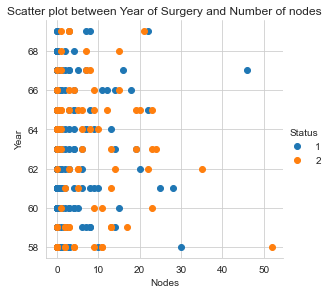

In [13]:
sns.set_style('whitegrid')
sns.FacetGrid(df,hue='Status',height=4)\
   .map(plt.scatter,'Nodes','Year')\
   .add_legend()
plt.title("Scatter plot between Year of Surgery and Number of nodes")
plt.show()

## Pair Plots (Bivariates)

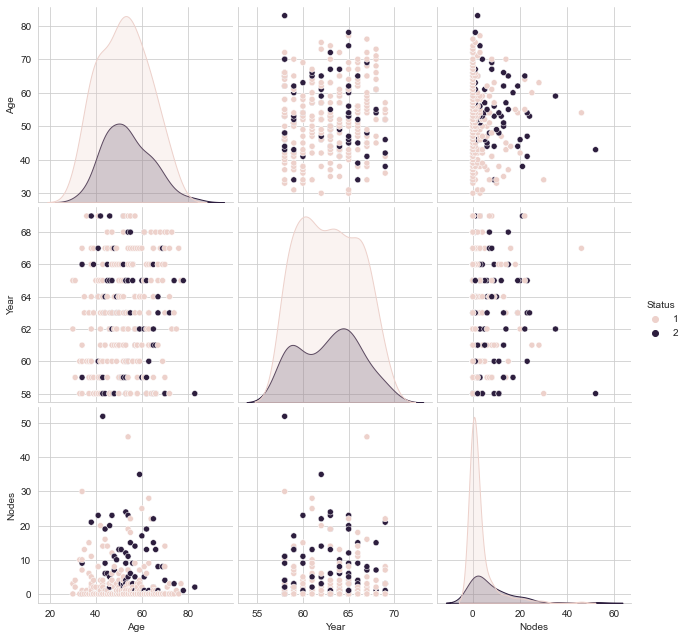

In [14]:
sns.set_style('whitegrid')
sns.pairplot(df,hue="Status",height=3)

plt.show()

### Observation:
1.All the points are overlapping on each other.

2.By this pair plots result we can conclude that it cann't be separated using linear separability.

### Univariate Analysis (plots using one variable)

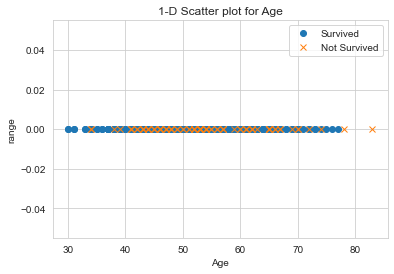

In [15]:
plt.plot(status1['Age'],np.zeros_like(status1['Age']),'o',label='Survived')
plt.plot(status2['Age'],np.zeros_like(status2['Age']),'x',label='Not Survived',)
plt.title("1-D Scatter plot for Age")
plt.xlabel("Age")
plt.ylabel("range")
plt.legend()

* If age of patient is > 75 then the patient cann't survive.

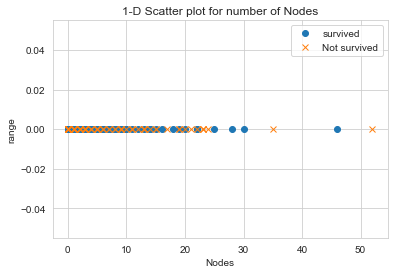

In [16]:
plt.plot(status1['Nodes'],np.zeros_like(status1['Nodes']),'o',label='survived')
plt.plot(status2['Nodes'],np.zeros_like(status2['Nodes']),'x',label='Not survived')
plt.title("1-D Scatter plot for number of Nodes")
plt.xlabel("Nodes")
plt.ylabel("range")
plt.legend()
plt.show()

* Here,we can observe that if the nodes value is greater than 50 then the patient cann't survive

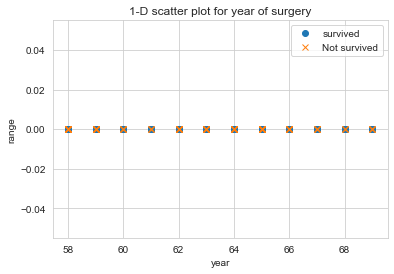

In [17]:
plt.plot(status1['Year'],np.zeros_like(status1['Year']),'o',label='survived')
plt.plot(status2['Year'],np.zeros_like(status2['Year']),'x',label='Not survived')
plt.title("1-D scatter plot for year of surgery")
plt.xlabel("year")
plt.ylabel("range")
plt.legend()
plt.show()

* All the points are completely overlapping each other.

## Histograms and PDF(Probability Density Function) for each Attribute

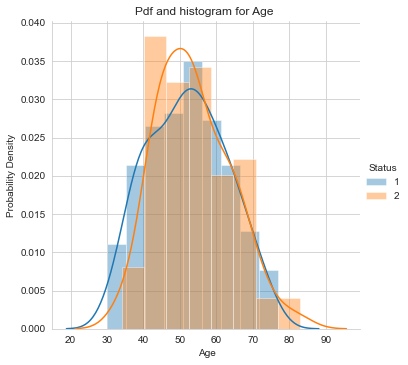

In [18]:
import warnings
warnings.filterwarnings('ignore')
sns.FacetGrid(df,hue="Status",height=5)\
   .map(sns.distplot,'Age')\
   .add_legend()
plt.ylabel("Probability Density")
plt.title("Pdf and histogram for Age ")
plt.show()

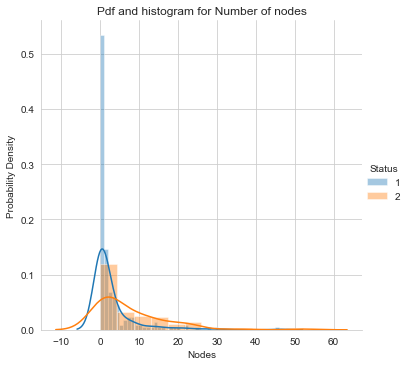

In [19]:
sns.FacetGrid(df,hue="Status",height=5)\
   .map(sns.distplot,'Nodes')\
   .add_legend()
plt.ylabel("Probability Density")
plt.title("Pdf and histogram for Number of nodes")
plt.show()

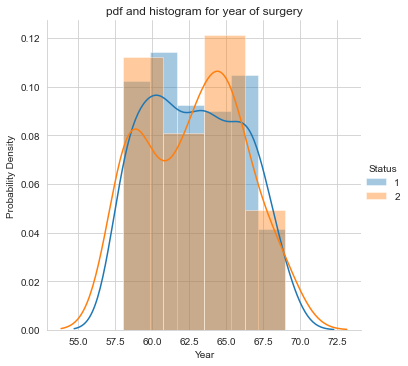

In [20]:
sns.FacetGrid(df,hue="Status",size=5)\
   .map(sns.distplot,'Year')\
   .add_legend()
plt.ylabel("Probability Density")
plt.title("pdf and histogram for year of surgery")
plt.show()

### Observation

1.By observing all the three pdf's and histograms we can conclude that each of them are overlapping on each other.

2.Patients with 0 nodes have high survival rate compare to other groups.

3.Both pdf's are intersecting at 42,then we can conclude that the patients of age group below 42 have high survival rate.

### Cumulative Distribution Function(CDF) along with Probability Density Function(PDF)

[0.04910714 0.10714286 0.125      0.09375    0.16517857 0.16517857
 0.09375    0.11160714 0.0625     0.02678571]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]

 [0.04910714 0.15625    0.28125    0.375      0.54017857 0.70535714
 0.79910714 0.91071429 0.97321429 1.        ]


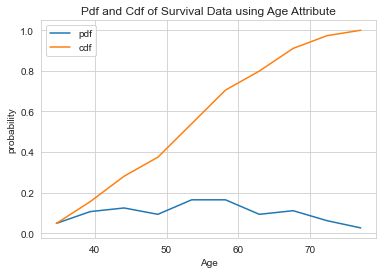

In [36]:
counts,bin_edges = np.histogram(status1['Age'],bins=10,density=True)
pdf = counts/sum(counts)
print(pdf)
print(bin_edges)

cdf = np.cumsum(pdf)
print("\n",cdf)
plt.xlabel("Age")
plt.ylabel("probability")
plt.title("Pdf and Cdf of Survival Data using Age Attribute")
plt.plot(bin_edges[1:],pdf,label='pdf')
plt.plot(bin_edges[1:],cdf,label='cdf')
plt.legend()

[0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]


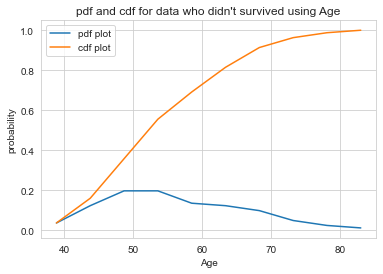

In [22]:
counts,bin_edges = np.histogram(status2['Age'],bins=10,density=True)
pdf = counts/sum(counts)
print(pdf)

cdf = np.cumsum(pdf)
plt.xlabel("Age")
plt.ylabel("probability")

plt.title("pdf and cdf for data who didn't survived using Age")
plt.plot(bin_edges[1:],pdf,label="pdf plot")
plt.plot(bin_edges[1:],cdf,label="cdf plot")
plt.legend()


* After the age of 42 to 55 the survival is camparatively less.

[0.83482143 0.08035714 0.02232143 0.02678571 0.01785714 0.00446429
 0.00892857 0.         0.         0.00446429]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]

 [0.83482143 0.91517857 0.9375     0.96428571 0.98214286 0.98660714
 0.99553571 0.99553571 0.99553571 1.        ]


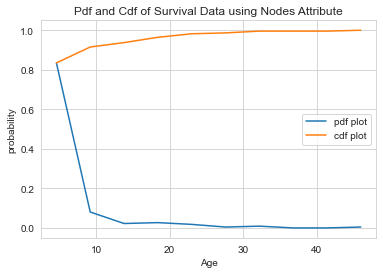

In [23]:
counts,bin_edges = np.histogram(status1['Nodes'],bins=10,density=True)
pdf = counts/sum(counts)
print(pdf)
print(bin_edges)

cdf = np.cumsum(pdf)
print("\n",cdf)
plt.xlabel("Age")
plt.ylabel("probability")
plt.title("Pdf and Cdf of Survival Data using Nodes Attribute")
plt.plot(bin_edges[1:],pdf,label='pdf plot')
plt.plot(bin_edges[1:],cdf,label='cdf plot')
plt.legend()

[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]


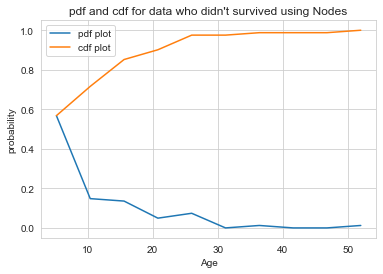

In [24]:
counts,bin_edges = np.histogram(status2['Nodes'],bins=10,density=True)
pdf = counts/sum(counts)
print(pdf)

cdf = np.cumsum(pdf)
plt.xlabel("Age")
plt.ylabel("probability")

plt.title("pdf and cdf for data who didn't survived using Nodes")
plt.plot(bin_edges[1:],pdf,label="pdf plot")
plt.plot(bin_edges[1:],cdf,label="cdf plot")
plt.legend()


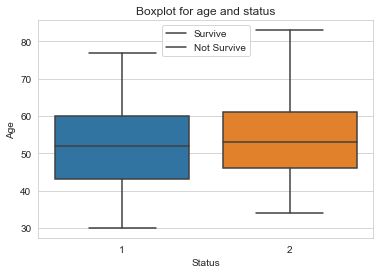

In [25]:
sns.boxplot(x='Status',y='Age',data=df)
plt.title("Boxplot for age and status")
plt.legend(['Survive','Not Survive'],loc="upper center")
plt.show()

* The patients of age group between 30-40 have maximum survival rate compare to other groups.

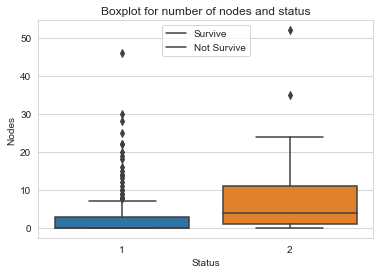

In [26]:
sns.boxplot(x='Status',y='Nodes',data=df)
plt.title("Boxplot for number of nodes and status")
plt.legend(['Survive','Not Survive'],loc="upper center")
plt.show()

* Patients with zero nodes can survive more compare to the patients with increase in nodes.In short,patients cann't survive with the increase of nodes.

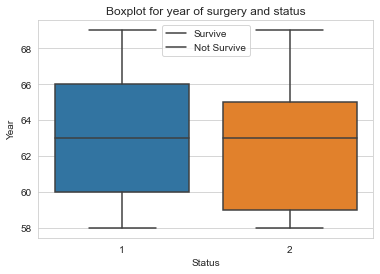

In [27]:
sns.boxplot(x='Status',y='Year',data=df)
plt.title("Boxplot for year of surgery and status")
plt.legend(['Survive','Not Survive'],loc="upper center")
plt.show()

* Patients whose surgery had done from the year 65-70 has more survival rate compare to other surgical years. 

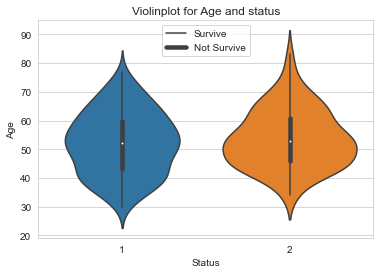

In [28]:
sns.violinplot(x='Status',y='Age',data=df,size=10)
plt.title("Violinplot for Age and status")
plt.legend(['Survive','Not Survive'],loc="upper center")
plt.show()

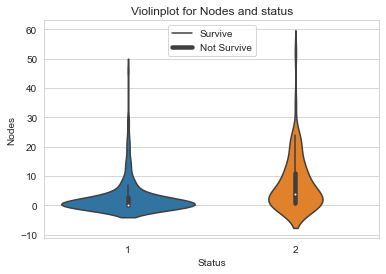

In [29]:
sns.violinplot(x='Status',y='Nodes',data=df,size=10)
plt.title("Violinplot for Nodes and status")
plt.legend(['Survive','Not Survive'],loc="upper center")
plt.show()

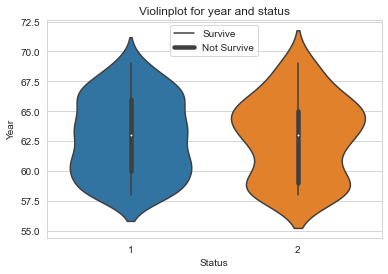

In [30]:
sns.violinplot(x='Status',y='Year',data=df,size=10)
plt.title("Violinplot for year and status")
plt.legend(['Survive','Not Survive'],loc="upper center")
plt.show()

1.50 percentile of people surviving have node value equal to 0.

2.Age group 75 and above could not survive for five years after the surgery.

3.The no of patients with nodes above 8 are very less and and stand as outliers to the median values.

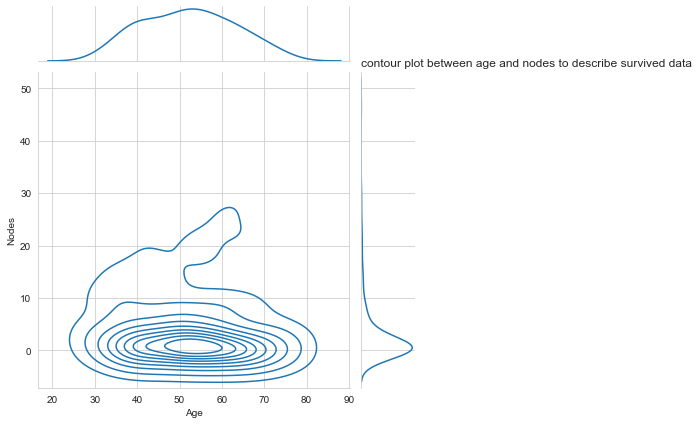

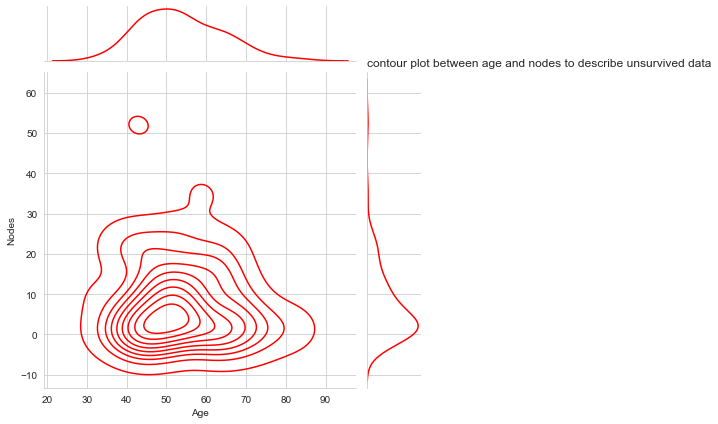

In [31]:
sns.jointplot(x='Age',y='Nodes',data=status1,kind='kde')
plt.title("contour plot between age and nodes to describe survived data",loc='left')
sns.jointplot(x='Age',y='Nodes',data=status2,kind='kde',color='red')
plt.title("contour plot between age and nodes to describe unsurvived data",loc='left')
plt.show()

Node value above 50 has no chance of survival.

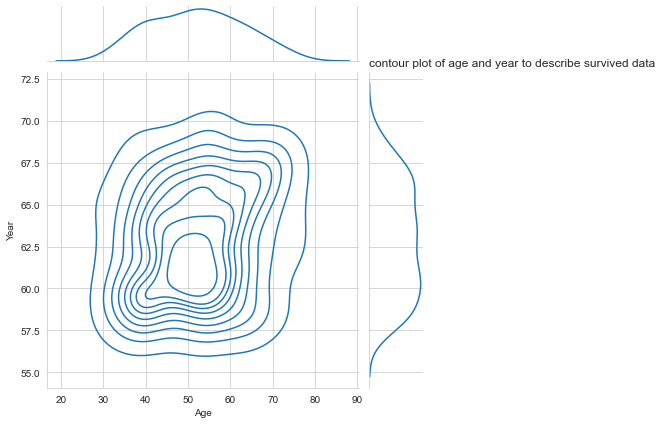

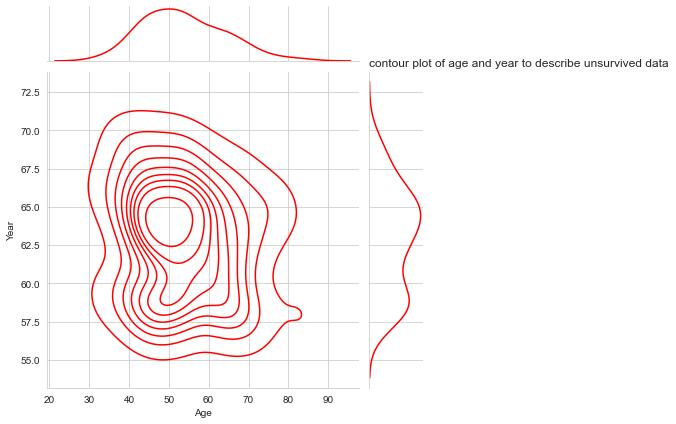

In [32]:
sns.jointplot(x='Age',y='Year',data=status1,kind='kde')
plt.title("contour plot of age and year to describe survived data",loc='left')
sns.jointplot(x='Age',y='Year',data=status2,kind='kde',color='red')
plt.title("contour plot of age and year to describe unsurvived data",loc='left')
plt.show()

Graphs don't show any trend.

In [33]:
from statsmodels import robust
print(robust.mad(status1['Age']))

13.343419966550417


In [34]:
print("Means of age:\n")
print(np.mean(status1['Age']))
print(np.mean(status2['Age']))
print("\nStandard Deviation of Age:\n")
print(np.std(status1['Age']))
print(np.std(status2['Age']))

Means of age:

52.11607142857143
53.67901234567901

Standard Deviation of Age:

10.913004640364269
10.10418219303131


In [35]:
print("Medians of Age:\n")
print(np.median(status1['Age']))
print(np.median(status2['Age']))


Medians of Age:

52.0
53.0


# Overall Conclusion:

### From pair plots and scatter plot:

1.We have high probability of survival,if a patient's nodes are equal to zero(0) and Age is less than 50.

2.In all the scatter and pair plots we can see clearly that all the points are overlapping on each other.

3.Scatter plot between year of surgery and Number of Nodes is best compare to other plots for classification.

### From PDF's and CDF's:

1.The survival rate of patients with zero nodes will be high compare to other groups.

2.The patients of age group below 42 have high survival rate.

3.We have high survival rate for the patients who had a treatment in the 60's.

4.Surgeries took place between the years 1960 to 1965 have approximately 88% of survival rate.

## Observation

1.The Patients survived- 224 , then the one who died -81 after 5 years of surgery .

2.The average value of age for the patients who survived after the surgery is 52.11

3.The average no of nodes for the paients who survived after the surgery is 2.79

4.75% of people who survived have age less then 60 years of age.

5.No one above age of 75 survived.

6.No one with node count above 46 survived.

7.The average no of nodes in person who could not survive was 4.0.

8.50 percentile of people surviving have node value equal to 0.